Question: What are people using the site for? What type of legal advice are they seeking?  

In [181]:
using Base
using CSV
using DataFrames
using Plots

In [194]:
#Get Directory
filepath = joinpath(pwd(), "data\\data")
#question
questions_file = joinpath(filepath, "questions.csv")
questions= CSV.read(questions_file, DataFrame)

Row,Id,StateAbbr,QuestionUno,CategoryUno,Category,SubcategoryUno,Subcategory,AskedByClientUno,AskedOnUtc,TakenByAttorneyUno,TakenOnUtc,ClosedByAttorneyUno,ClosedOnUtc,LegalDeadline
,Int64,String3,String,String,String,String,String,String,String31,String,String31,String,String31,String31
1,1,NC,BB53B2A4-7C1B-45C3-9693-62047889317D,C932D197-7F43-4BCF-BE0B-FE5F5DBCB9EF,Family and Children,E9F87919-0CD5-4D9D-AAC6-3CBC49132F1D,Family/Divorce/Custody/Visitation/Child Support,9C35423C-914A-42BC-8EBC-A370E76E2178,2019-06-19 22:10:06,NULL,NULL,NULL,2019-08-13 15:09:06,2019-07-08 00:00:00
2,2,NC,0C49F841-2782-4313-961E-7882B96D0854,C8E1275A-6C42-42E4-9B7D-231BAC438FC9,Individual Rights,73A59926-BA0B-44EC-ABF3-F4C9181EEA83,Civil/Constitutional Rights,DF636AEE-7D08-4F90-9A5C-0A2A726C6B59,2019-06-19 23:34:36,NULL,NULL,NULL,2019-08-13 15:09:14,NULL
3,3,NC,BFC28E08-B6B1-4185-A91A-89DF90816BE4,C8E1275A-6C42-42E4-9B7D-231BAC438FC9,Individual Rights,73A59926-BA0B-44EC-ABF3-F4C9181EEA83,Civil/Constitutional Rights,DF636AEE-7D08-4F90-9A5C-0A2A726C6B59,2019-06-19 23:57:18,FA34142B-1575-4720-981C-2D28C3560137,2019-06-22 02:37:16,FA34142B-1575-4720-981C-2D28C3560137,2019-06-24 19:02:35,NULL
4,4,NC,45B24109-243A-489B-B0D2-2F36C2A369FE,C932D197-7F43-4BCF-BE0B-FE5F5DBCB9EF,Family and Children,E9F87919-0CD5-4D9D-AAC6-3CBC49132F1D,Family/Divorce/Custody/Visitation/Child Support,C9C3FA40-0D60-49B9-97F1-63AFEFAFA484,2019-06-20 02:33:14,FA34142B-1575-4720-981C-2D28C3560137,2019-07-27 18:04:08,FA34142B-1575-4720-981C-2D28C3560137,2019-07-31 05:49:18,NULL
5,5,NC,C4707F71-FE4A-4154-8174-AF00BEE2B361,F6016FBD-9501-4448-BCD3-BBB0E834E33B,Consumer Financial Questions,73FE486E-2B51-456A-A6D9-78A7D05802AA,"Bankruptcy, Debts & Purchases",ED7DEA10-CDB7-4A05-891D-889D1EA710BE,2019-06-20 17:04:47,NULL,NULL,NULL,2019-08-13 15:09:20,NULL
6,6,NC,C157FEFD-9F47-4288-B853-E1E7918A568F,C932D197-7F43-4BCF-BE0B-FE5F5DBCB9EF,Family and Children,E9F87919-0CD5-4D9D-AAC6-3CBC49132F1D,Family/Divorce/Custody/Visitation/Child Support,19A1157F-BAF1-437B-84FA-41C5FDF6DE97,2019-06-20 18:11:56,NULL,NULL,NULL,2019-08-13 15:10:26,NULL
7,7,NC,B2D45F8C-7BE0-447F-82B4-121B7A0E62C5,A56CA695-DA51-419F-87CF-228B360F2E9B,Housing and Homelessness,F4BB9A8A-D699-48FD-A6E7-58FB95CC4021,Housing/Eviction/Foreclosure/Tenants,32D8D09B-C6CF-4B1B-82A9-9F85F199C86C,2019-06-20 19:20:02,NULL,NULL,NULL,2019-08-13 15:10:32,NULL
8,8,NC,BD228C28-ACEB-4109-AD9C-85166EF2A647,E6F4FD7C-FCE9-4763-AADD-0544158DE0BB,Other,E3257971-6837-4BAD-B00D-E4040F0C8B8A,Civil Procedure,714BF984-B485-4BF5-93D9-4742C862643B,2019-06-20 18:46:40,FA34142B-1575-4720-981C-2D28C3560137,2019-06-24 19:04:14,NULL,2019-07-03 23:46:02,NULL
9,9,NC,459A9C10-12DF-4548-825D-EB7864457CC6,E6F4FD7C-FCE9-4763-AADD-0544158DE0BB,Other,A911AEC6-4E0E-45B3-8807-024EC3C2EADE,Expungement,3A361F5F-C49D-41AF-8BC4-BC211D14D6E1,2019-06-20 21:26:13,9514BCF0-8AD4-4948-B12E-706BBF451492,2019-07-18 17:39:46,9514BCF0-8AD4-4948-B12E-706BBF451492,2019-07-20 22:18:18,NULL


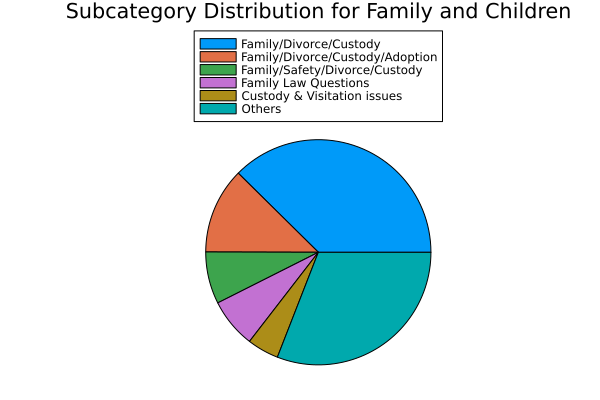

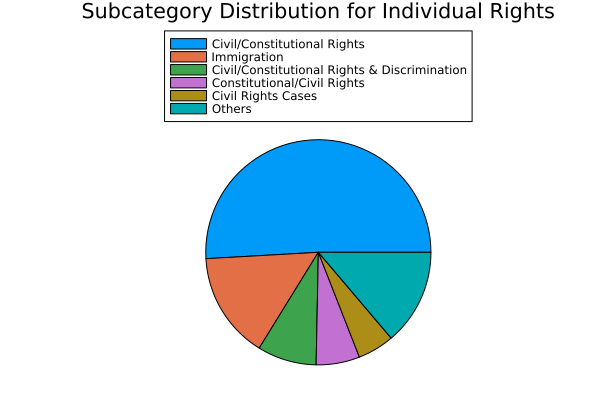

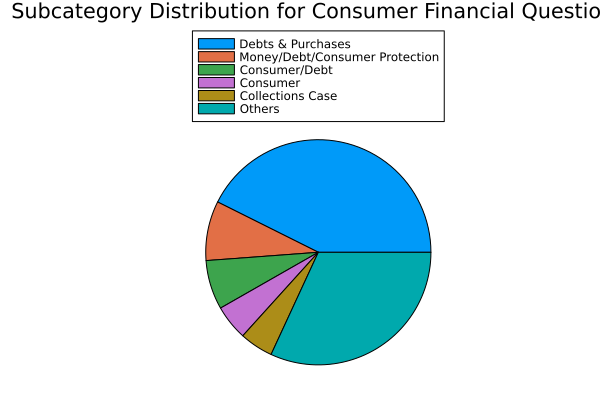

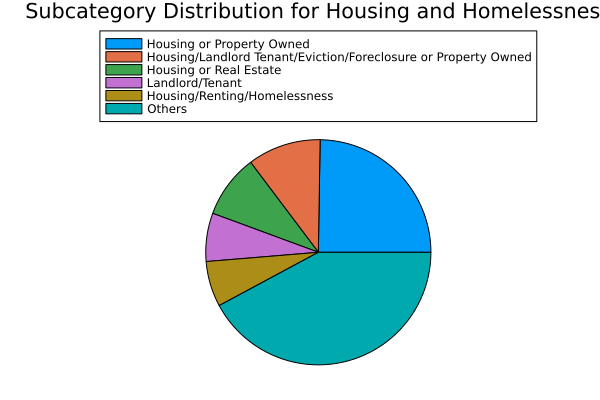

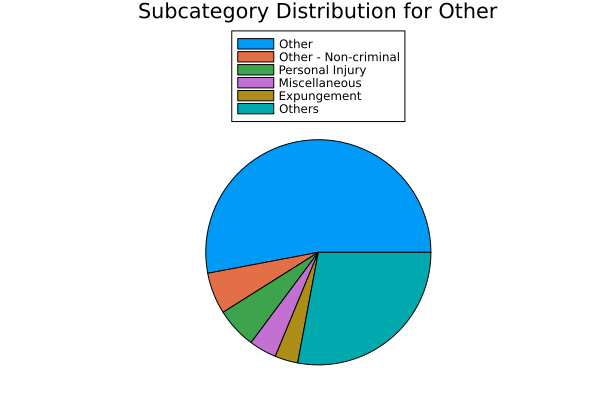

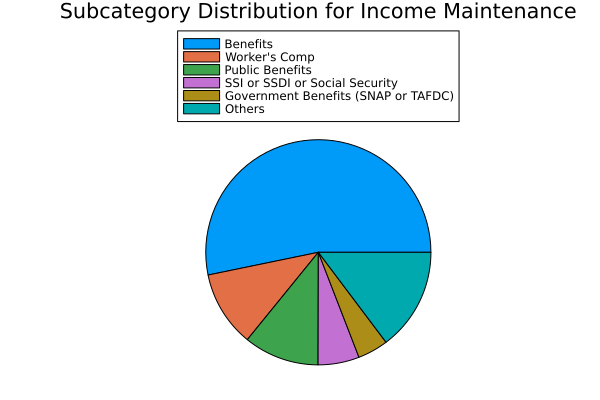

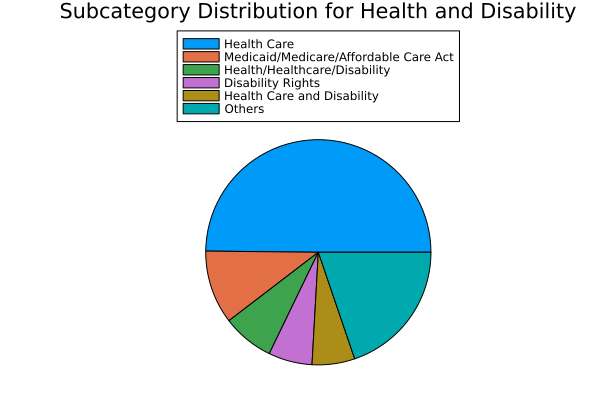

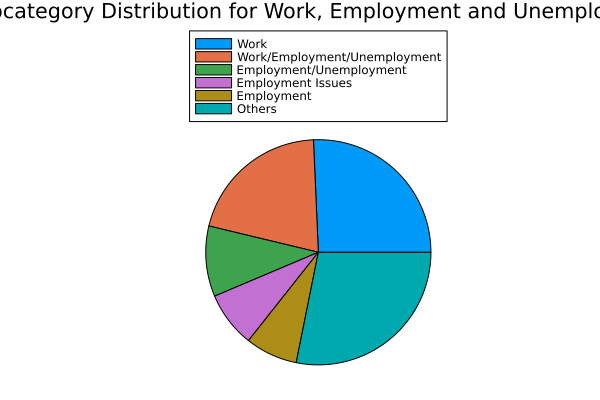

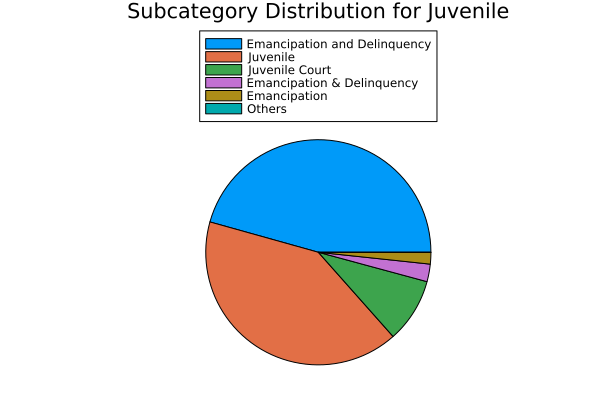

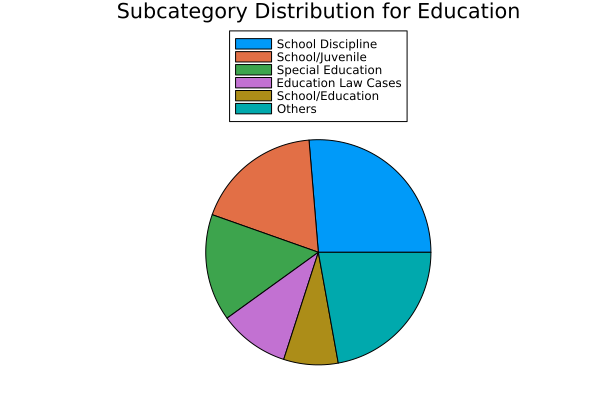

LoadError: UndefVarError: savefig not defined

In [197]:
# Top5 most asked subcategory for each category

# Get a list of unique categories
categories = unique(questions[:, :Category])

# Loop through the categories and create a pie chart for each one
for category in categories
    # Filter the DataFrame to include only questions in the current category
    filtered = filter(row -> row.Category == category, df)
    
    # Group the filtered DataFrame by subcategory and count the number of questions in each subcategory
    counts = combine(groupby(filtered, :Subcategory), :Id => x -> length(x))
    rename!(counts, :Id_function => :Count)
    
    # Get the top 5 most frequent subcategories
    counts_sorted = sort!(counts, :Count, rev=true)
    top5 = counts_sorted[1:5, :]
    
    # Group the remaining subcategories as "Others"
    others = counts_sorted[6:size(counts_sorted, 1), :]
    others_count = sum(others.Count)
    others = DataFrame(Subcategory=["Others"], Count=[others_count])
    
    # Combine the top 5 subcategories and "Others"
    combined = vcat(top5, others)
    
    # Create a pie chart of the subcategory counts for the current category
    pie_chart = pie(combined.Subcategory, combined.Count, title="Subcategory Distribution for $category", legend=:outertop, normalize=true)
    
    # Display the pie chart
    display(pie_chart)
end
    savefig("C:\\pie.png")


In [191]:
function count_null(arr)
    n = length(arr)
    count = 0
    for i in 1:n
        if arr[i] == "NULL"
            count += 1
        end
    end
    return count
end


count_null (generic function with 1 method)

In [198]:
# # Loop through the categories and create a pie chart for each one
# for category in categories
#     # Filter the DataFrame to include only questions in the current category
#     filtered = filter(row -> row.Category == category, df)
    
#     # Group the filtered DataFrame by subcategory and count the number of questions in each subcategory
#     counts = combine(groupby(filtered, :Subcategory), :Id => x -> count_null(x))
#     rename!(counts, :Id_function => :Count)
    
#     # Get the top 5 most frequent subcategories
#     counts_sorted = sort!(counts, :Count, rev=true)
#     top5 = counts_sorted[1:5, :]
    
#     # Group the remaining subcategories as "Others"
#     others = counts_sorted[6:size(counts_sorted, 1), :]
#     others_count = sum(others.Count)
#     others = DataFrame(Subcategory=["Others"], Count=[others_count])
    
#     # Combine the top 5 subcategories and "Others"
#     combined = vcat(top5, others)
    
#     # Create a pie chart of the subcategory counts for the current category
#     pie_chart = pie(combined.Subcategory, combined.Count, title="Subcategory Distribution for $category", legend=:outertop, normalize=true)
    
#     # Display the pie chart
#     display(pie_chart)
# end

In [199]:
# # Read CSV file into a DataFrame
# questionposts_file = joinpath(filepath, "questionposts.csv")
# df2= CSV.read(questionposts_file, DataFrame)

# # Extract the questions column
# questions = df2[:, "PostText"]

# # Create an empty dictionary to store the keyword frequencies
# keywordFrequencies = Dict{String, Int64}()

# # Loop through each question and count keyword frequencies
# for question in questions
#     # Split the question into words
#     words = split(question, " ")
#     for word in words
#         # Remove leading/trailing whitespaces and convert to lowercase
#         word = strip(lowercase(word))
#         # Skip empty words
#         isempty(word) && continue
#         # Count the word frequency in the dictionary
#         keywordFrequencies[word] = get(keywordFrequencies, word, 0) + 1
#     end
# end

# # Sort the keywords by frequency in descending order
# sortedKeywords = sort(collect(keywordFrequencies), by=x->x[2], rev=true)

# # Print the top 10 keywords with their frequencies
# println("Top 10 Keywords and Their Frequencies:")
# for (keyword, frequency) in sortedKeywords[1:min(10, end)]
#     println("Keyword: $keyword | Frequency: $frequency")
# end